In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [5]:
heat_read = pd.read_csv('heat_df.csv')
rain_read = pd.read_csv('rain_df.csv')

In [8]:
#Locate null rows for heat events
heat_df = heat_read.rename(columns={'Unnamed: 0': 'City'})
null_rows = []
for index, row in heat_df.iterrows():
    if row['1950'] == 0:
        null_rows.append(index)
        
null_rows

[3, 26, 84]

In [9]:
#check in csv to make sure they are actually null and not just missing one value
#remove null rows
for ind in null_rows:
    heat_df.drop([ind], inplace=True)
    
heat_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Houston_avg,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,33.2,27.5,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2
1,Navarre_avg,21.0,16.2,18.9,18.8,18.7,16.3,17.6,16.9,19.4,...,27.0,30.3,27.8,34.4,29.7,31.9,24.7,31.3,34.3,33.9
2,Vallejo_avg,19.2,12.8,14.3,17.7,22.2,16.2,17.2,19.9,15.2,...,26.3,20.9,22.0,27.3,22.3,24.9,22.9,25.3,27.8,26.1
4,Four Seasons_avg,23.6,21.1,20.3,20.5,18.0,19.7,20.5,19.0,16.3,...,26.5,24.8,23.4,19.4,21.7,25.7,20.3,29.2,30.8,29.4
5,Mapleton_avg,18.0,23.3,17.3,18.5,20.7,18.6,22.2,18.5,11.2,...,30.9,29.2,26.6,32.0,24.5,33.1,39.3,40.1,37.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Oak Valley_avg,22.5,17.0,20.3,16.6,16.8,14.7,17.0,14.5,14.6,...,22.1,24.1,26.3,32.6,29.4,25.4,32.6,28.2,29.6,26.7
96,Houston_avg,18.0,21.1,20.0,23.8,26.7,23.6,13.8,18.0,19.8,...,33.2,27.5,26.1,28.7,30.9,31.2,24.2,37.2,32.6,38.2
97,Wiscasset_avg,15.6,18.5,18.6,13.0,18.4,20.8,20.7,15.0,16.1,...,23.2,23.2,22.4,27.4,28.4,22.0,34.8,31.1,23.8,23.4
98,Rutledge_avg,20.7,15.9,16.9,17.5,16.7,14.1,18.0,14.5,15.3,...,23.5,25.1,25.6,32.4,29.2,24.5,33.3,30.3,29.0,27.9


Text(0, 0.5, 'Extreme Heat Evetns (count)')

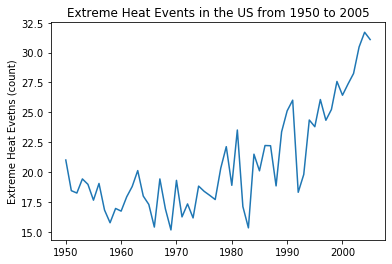

In [20]:
years = list(range(1950, 2006))
averages = []
for year in years:
    averages.append(heat_df[str(year)].mean())
    
averages

plt.plot(usa_heat['Year'], usa_heat['Average Heat Events'])
plt.title("Extreme Heat Events in the US from 1950 to 2005")
plt.ylabel("Extreme Heat Evetns (count)")

In [15]:
#Locate null rows for rain events
rain_df = rain_read.rename(columns={'Unnamed: 0': 'City'})
null_rows = []
for index, row in rain_df.iterrows():
    if row['1950'] == 0:
        null_rows.append(index)
        
null_rows

[3, 26, 84]

In [16]:
#check in csv to make sure they are actually null and not just missing one value
#remove null rows
for ind in null_rows:
    rain_df.drop([ind], inplace=True)
    
rain_df

,City,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Houston_avg,8.2,9.7,8.5,9.0,8.4,9.0,12.0,8.7,8.1,...,9.0,10.9,10.1,8.7,10.3,10.1,9.7,6.8,9.2,7.2
1,Navarre_avg,8.8,10.6,9.5,10.4,11.7,9.9,10.7,11.4,10.2,...,11.3,11.9,9.9,9.0,10.5,13.7,11.3,10.7,12.7,10.0
2,Vallejo_avg,7.5,4.3,5.2,5.3,6.0,5.8,6.3,6.4,6.6,...,4.9,6.7,3.8,6.9,5.4,4.3,5.5,6.5,5.5,6.9
4,Four Seasons_avg,8.8,9.3,10.1,10.3,10.4,10.0,9.0,10.1,8.8,...,9.8,9.1,10.5,14.2,10.3,9.3,10.3,9.0,6.9,10.4
5,Mapleton_avg,9.2,8.1,8.3,8.1,9.9,8.7,7.4,8.0,8.7,...,9.0,11.9,8.5,11.3,11.1,8.9,6.6,8.6,9.5,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Oak Valley_avg,8.8,11.7,9.1,9.9,10.0,9.9,9.0,12.0,10.4,...,12.1,10.1,11.4,11.1,10.3,10.2,8.6,11.4,10.5,13.4
96,Houston_avg,8.2,9.7,8.5,9.0,8.4,9.0,12.0,8.7,8.1,...,9.0,10.9,10.1,8.7,10.3,10.1,9.7,6.8,9.2,7.2
97,Wiscasset_avg,12.2,12.5,8.5,12.0,12.3,11.8,12.3,12.6,10.5,...,13.9,11.3,14.2,12.8,12.4,13.2,10.0,14.0,12.4,18.0
98,Rutledge_avg,10.2,12.2,10.3,10.7,10.8,10.3,9.9,12.5,10.4,...,12.1,11.1,12.6,12.3,12.2,10.4,9.3,13.3,10.6,13.6


Text(0, 0.5, 'Extreme Precipitation Evetns (count)')

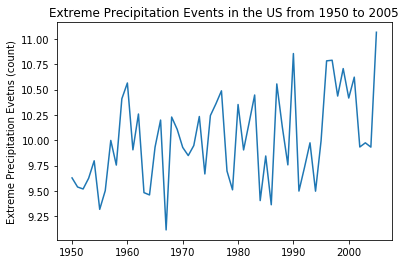

In [21]:
rain_averages = []
for year in years:
    rain_averages.append(rain_df[str(year)].mean())
    

plt.plot(usa_rain['Year'], usa_rain['Average Extreme Precipitation Events'])
plt.title("Extreme Precipitation Events in the US from 1950 to 2005")
plt.ylabel("Extreme Precipitation Evetns (count)")